# Challenge 1

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [290]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [287]:
df = pd.read_csv('data/Fitbit2.csv')

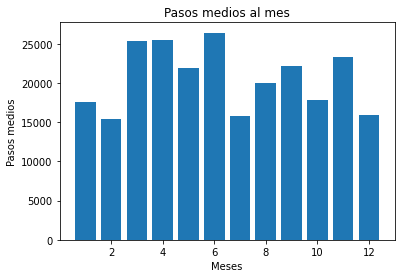

In [270]:
df2=df[['Steps', 'Months_encoded']]
df2.groupby(['Months_encoded']).mean().round(-2)
plt.bar(df2.Months_encoded, df2.Steps, align='center')
plt.xlabel("Meses")
plt.ylabel("Pasos medios")
plt.title("Pasos medios al mes")
plt.show()

#wwuwuuuuuuuuu. no hemos conseguido poner lo#s meses con letra en el eje x, 
#además sería bueno poder saber cómo dar la vuelta y ponerlos en el Y

## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**

Hints:
- Use `Months_encoded` column
- Use `pd` method `.groupby` to obtain your plottable data
- Use `pd` method `.plot`

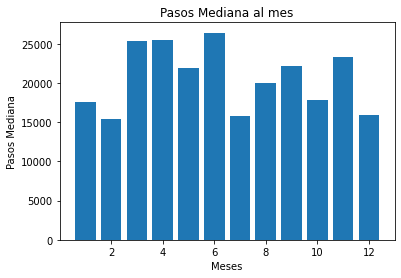

In [202]:
df2=df[['Steps', 'Months_encoded']]
df2.groupby(['Months_encoded']).median().round(-2)
plt.bar(df2.Months_encoded, df2.Steps, align='center')
plt.xlabel("Meses")
plt.ylabel("Pasos Mediana")
plt.title("Pasos Mediana al mes")
plt.show()

2. **How the sleeping efficiency distributes. Use the appropriate visualization to show the median steps by month?**

Excluding days when `Yesterday_sleep` is 0, we would like to understand:
 - How the sleeping efficiency distributes. Plot a distribution, plus a vertical line with the mean.
 - How the sleeping efficiency distributes on Weekdays vs Workdays. Plot both distributions toguether.

Hints:
- Use `Yesterday_sleep_efficiency` column, among others.
- Use `sns` function `.hist` to plot your continuous data.
- Use `plt` function `.axvline` to plot the mean.
- Use `hue` parameter to distinguish between Workday and Weekend.
- Save your figures.

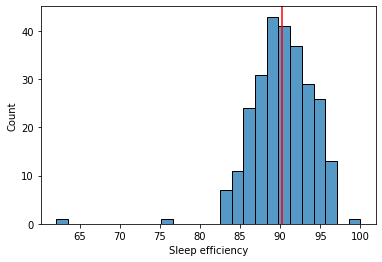

In [300]:
df3=df[(df.Yesterday_sleep!=0) & (df['Hours Sleep']!=0)]
histograma=sns.histplot(x=df3['Sleep efficiency'])
histograma.axvline(x=df3['Sleep efficiency'].mean(), c="red", label="mean")
histograma.figure.savefig('histograma.jpg', dpi=1000)

In [297]:
histograma.savefig("histograma.jpg", dpi=1000)


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

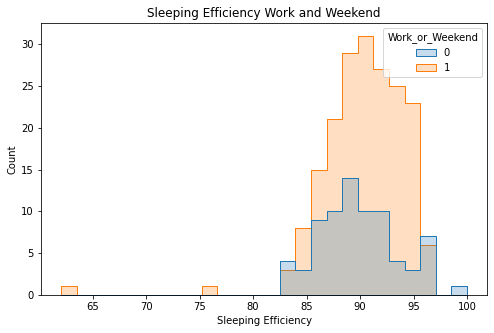

In [281]:

# initialize plot and set figure size
fig, ax = plt.subplots(figsize=(8, 5))

# you can use seaborn to plot, add ax parameter at the end
sns.histplot(x=df3['Sleep efficiency'], hue=df3['Work_or_Weekend'], element="step")
plt.xlabel("Sleeping Efficiency")
plt.ylabel("Count")
plt.title("Sleeping Efficiency Work and Weekend")

plt.show()

## Coding Session II - 30 minutes

**Draw 4 scatter plots (2 rows and 2 columns) of the following features. Include some interesting legend and some interesting text**.

 - `Minutes Lightly Active`  vs `Steps`
 - `Minutes Very Active` vs `Steps`
 - `Minutes Sedentary` vs `Steps`
 - `Minutes Sedentary` vs `Minutes Very Active`
 
Hints:
 - Use `plt.subplots`
 - Use `ax.annotate`
 - Use `ax.legend` and `label` parameter

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Minutes Very Active'>

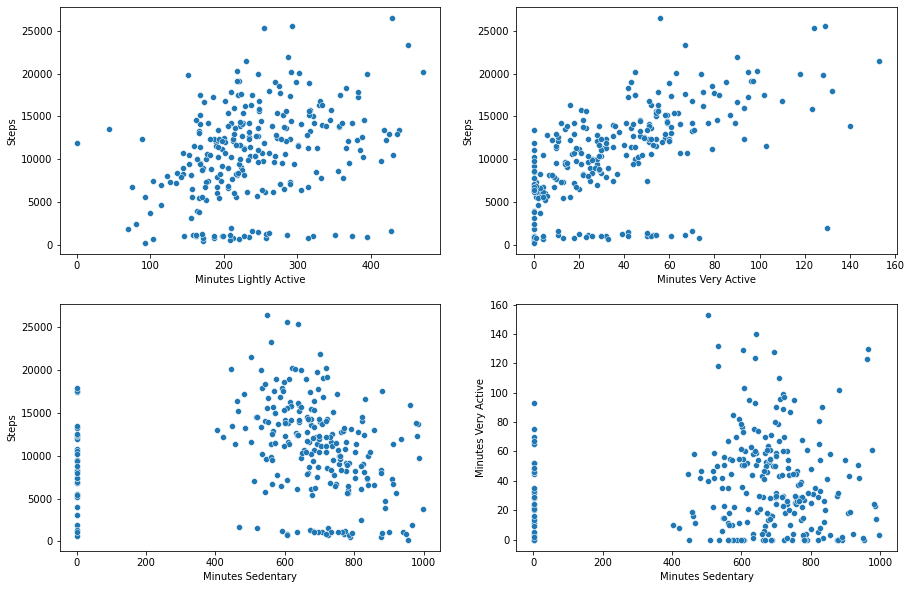

In [283]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.scatterplot(x=df3['Minutes Lightly Active'], y=df3['Steps'], data=df3, ax=axs[0, 0])
sns.scatterplot(x=df3['Minutes Very Active'], y=df3['Steps'], data=df3, ax=axs[0, 1])
sns.scatterplot(x=df3['Minutes Sedentary'], y=df3['Steps'], data=df3, ax=axs[1, 0])
sns.scatterplot(x=df3['Minutes Sedentary'], y=df3['Minutes Very Active'], data=df3, ax=axs[1, 1])

<AxesSubplot:xlabel='Minutes Sedentary', ylabel='Minutes Lightly Active'>

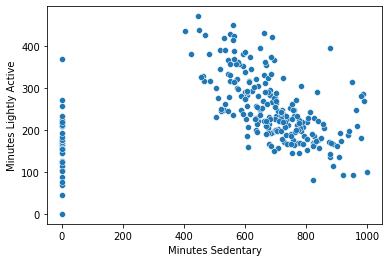

In [286]:
sns.scatterplot(x=df3['Minutes Sedentary'], y=df3['Minutes Lightly Active'], data=df3)